## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform
from pathlib import Path

In [8]:
GWAS_DIR = Path(os.environ["PHENOPLIER_RESULTS_GLS_NULL_SIMS_UKB_50PCS"]) / "post_imputed_gwas"
print(GWAS_DIR)

/tmp/phenoplier/results/gls/gwas/null_sims/ukb_50pcs/post_imputed_gwas


In [9]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["pvalue"] >= 0) & (gwas["pvalue"] <= 1)]
    return gwas

In [10]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [11]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.009906  0.992097   
1                 T          hg38   0.011650          312 -0.054967  0.956165   
2                 C          hg38   0.122330          312 -0.000713  0.999431   
3                 C          hg38   0.026214          312 -0.059255  0.952749   
4                 C          hg38   0.021359          312 -0.047049  0.962474   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


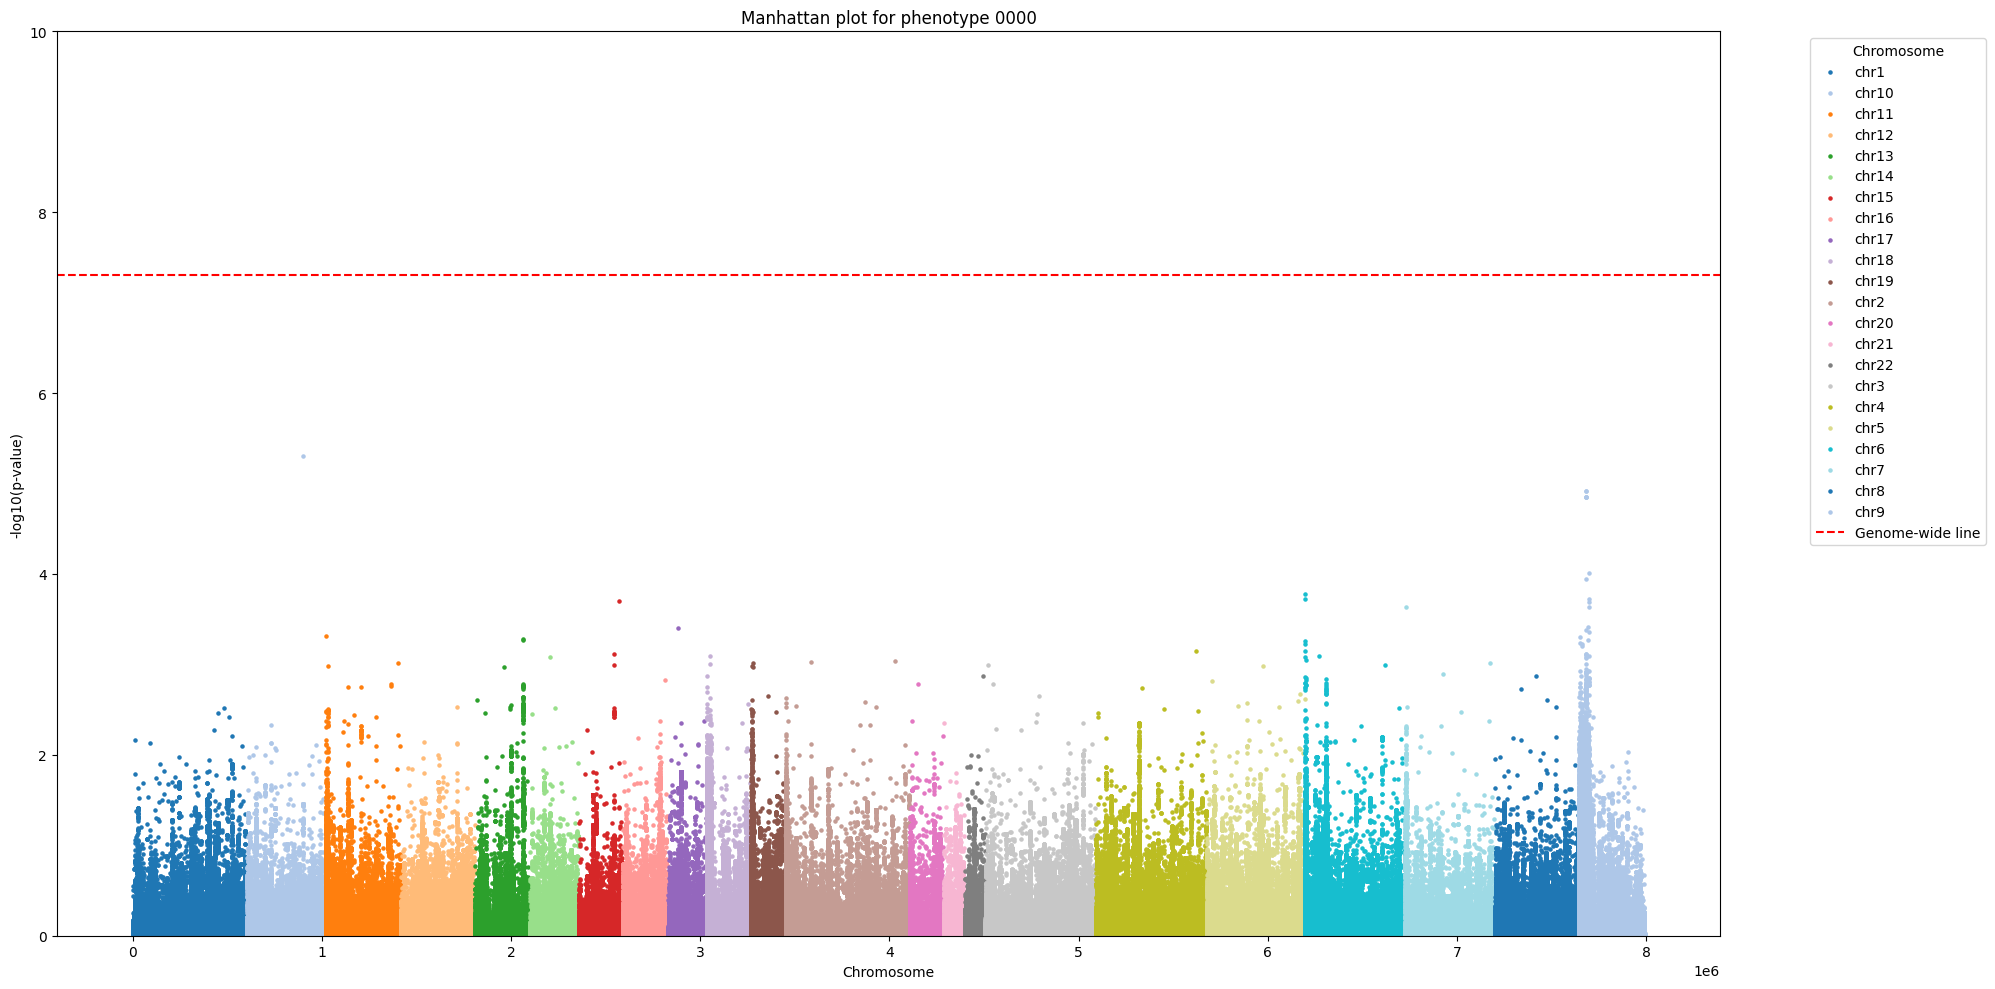

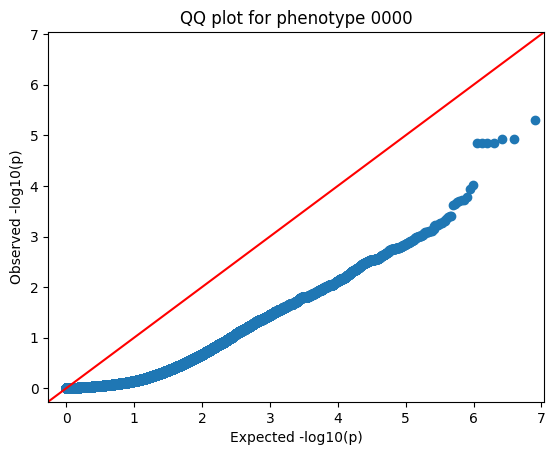

Phenotype 1: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.010857  0.991338   
1                 T          hg38   0.011650          312 -0.023430  0.981307   
2                 C          hg38   0.122330          312 -0.005288  0.995780   
3                 C          hg38   0.026214          312  0.011424  0.990885   
4                 C          hg38   0.021359          312  0.016936  0.986488   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


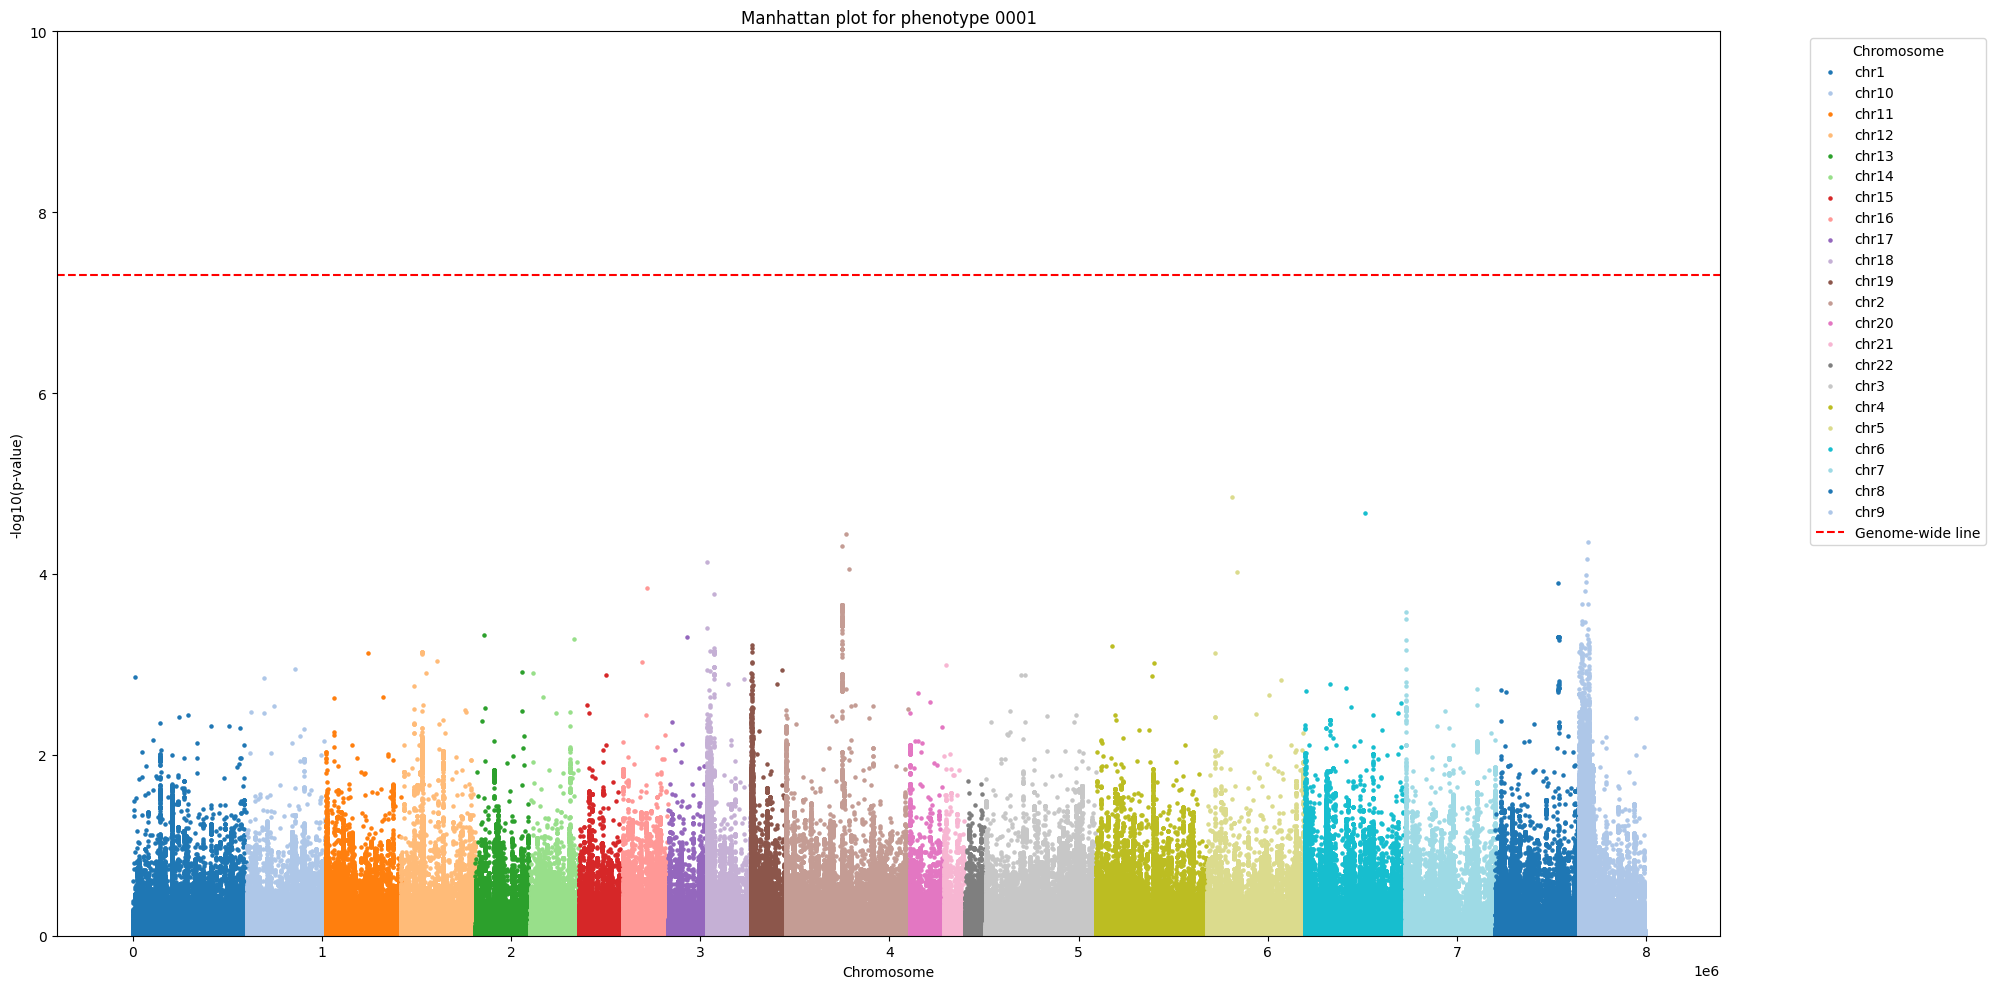

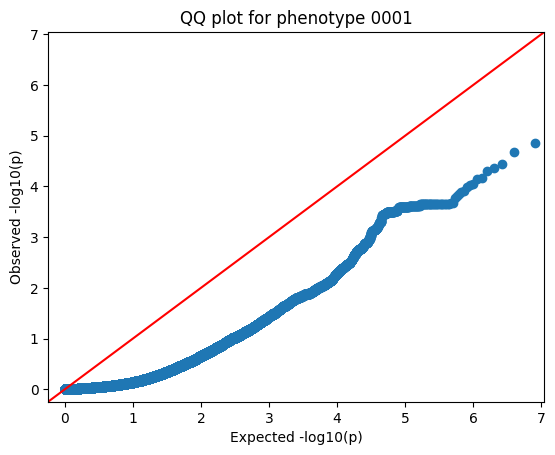

Phenotype 2: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312 -0.010808  0.991377   
1                 T          hg38   0.011650          312 -0.048674  0.961179   
2                 C          hg38   0.122330          312  0.004787  0.996181   
3                 C          hg38   0.026214          312 -0.104510  0.916764   
4                 C          hg38   0.021359          312 -0.089534  0.928657   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


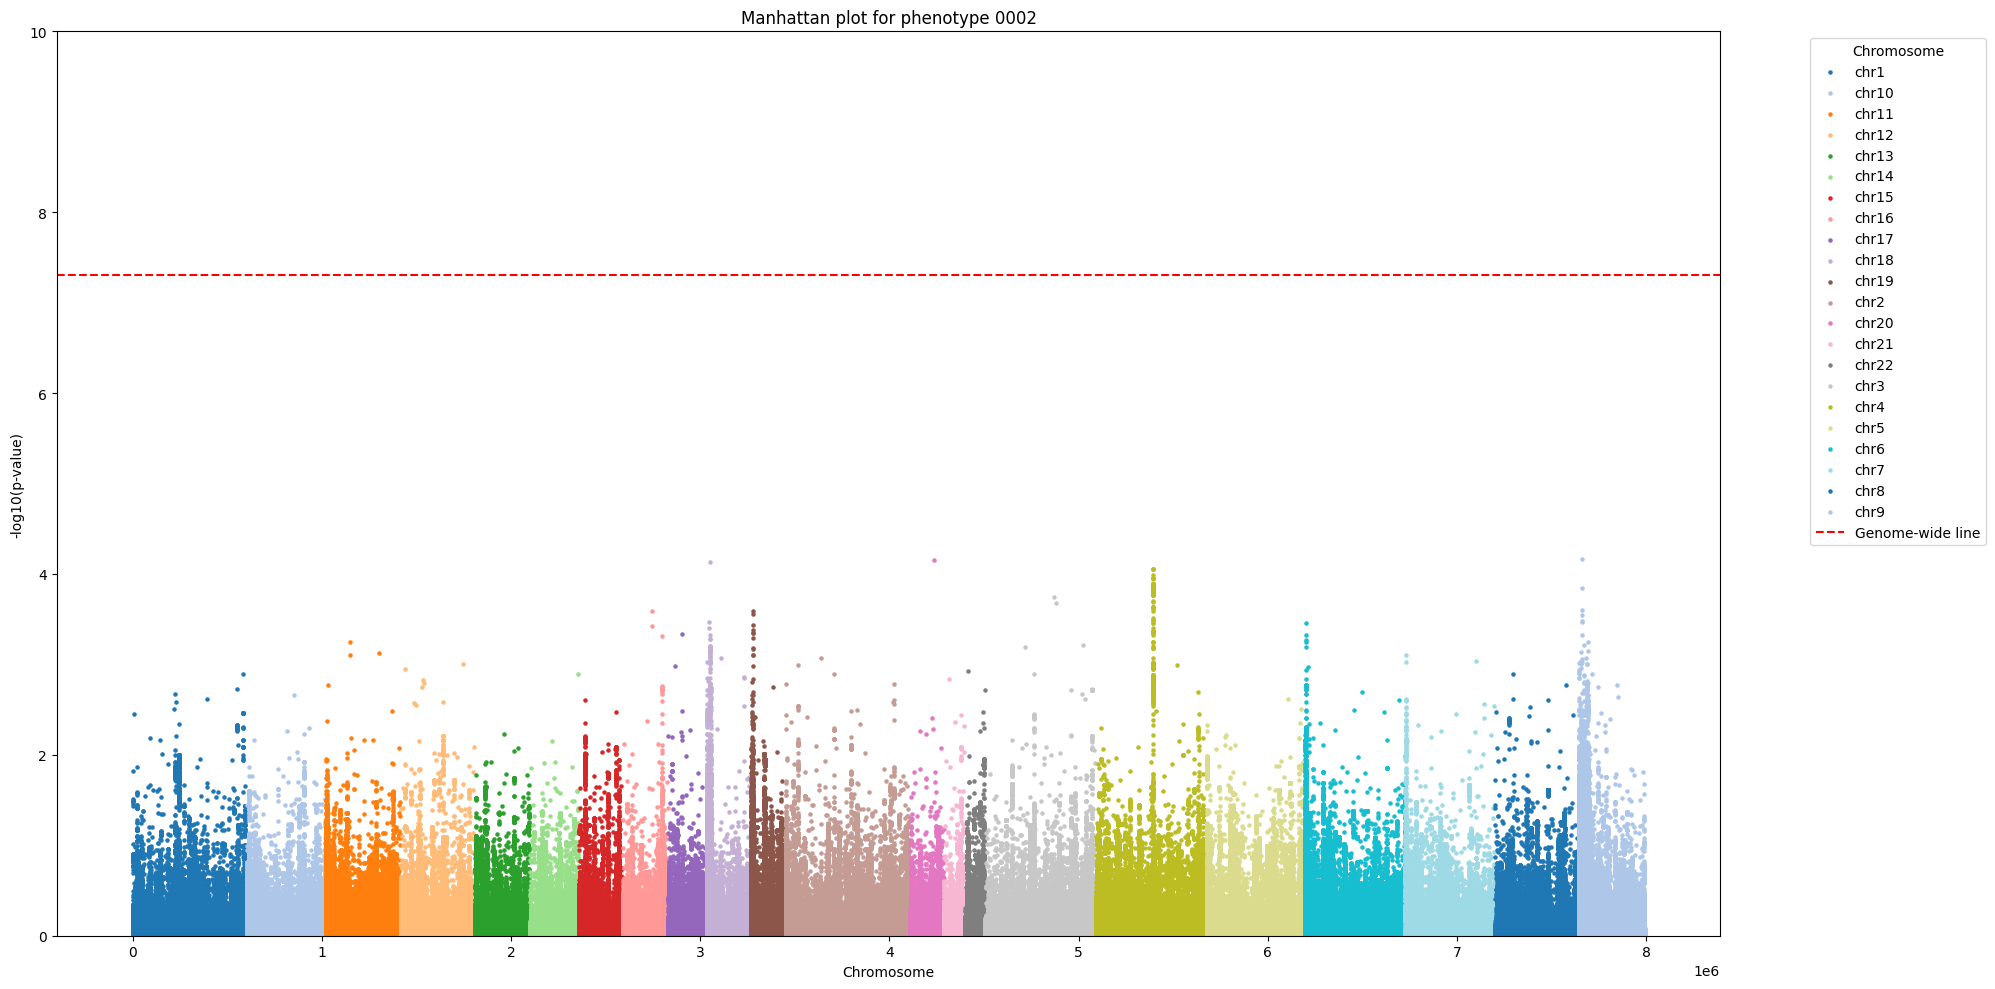

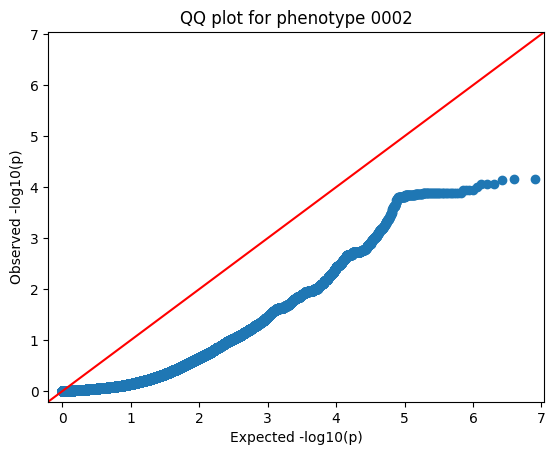

Phenotype 3: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312 -0.012845  0.989751   
1                 T          hg38   0.011650          312  0.023436  0.981302   
2                 C          hg38   0.122330          312 -0.000480  0.999617   
3                 C          hg38   0.026214          312  0.021527  0.982825   
4                 C          hg38   0.021359          312  0.019890  0.984131   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


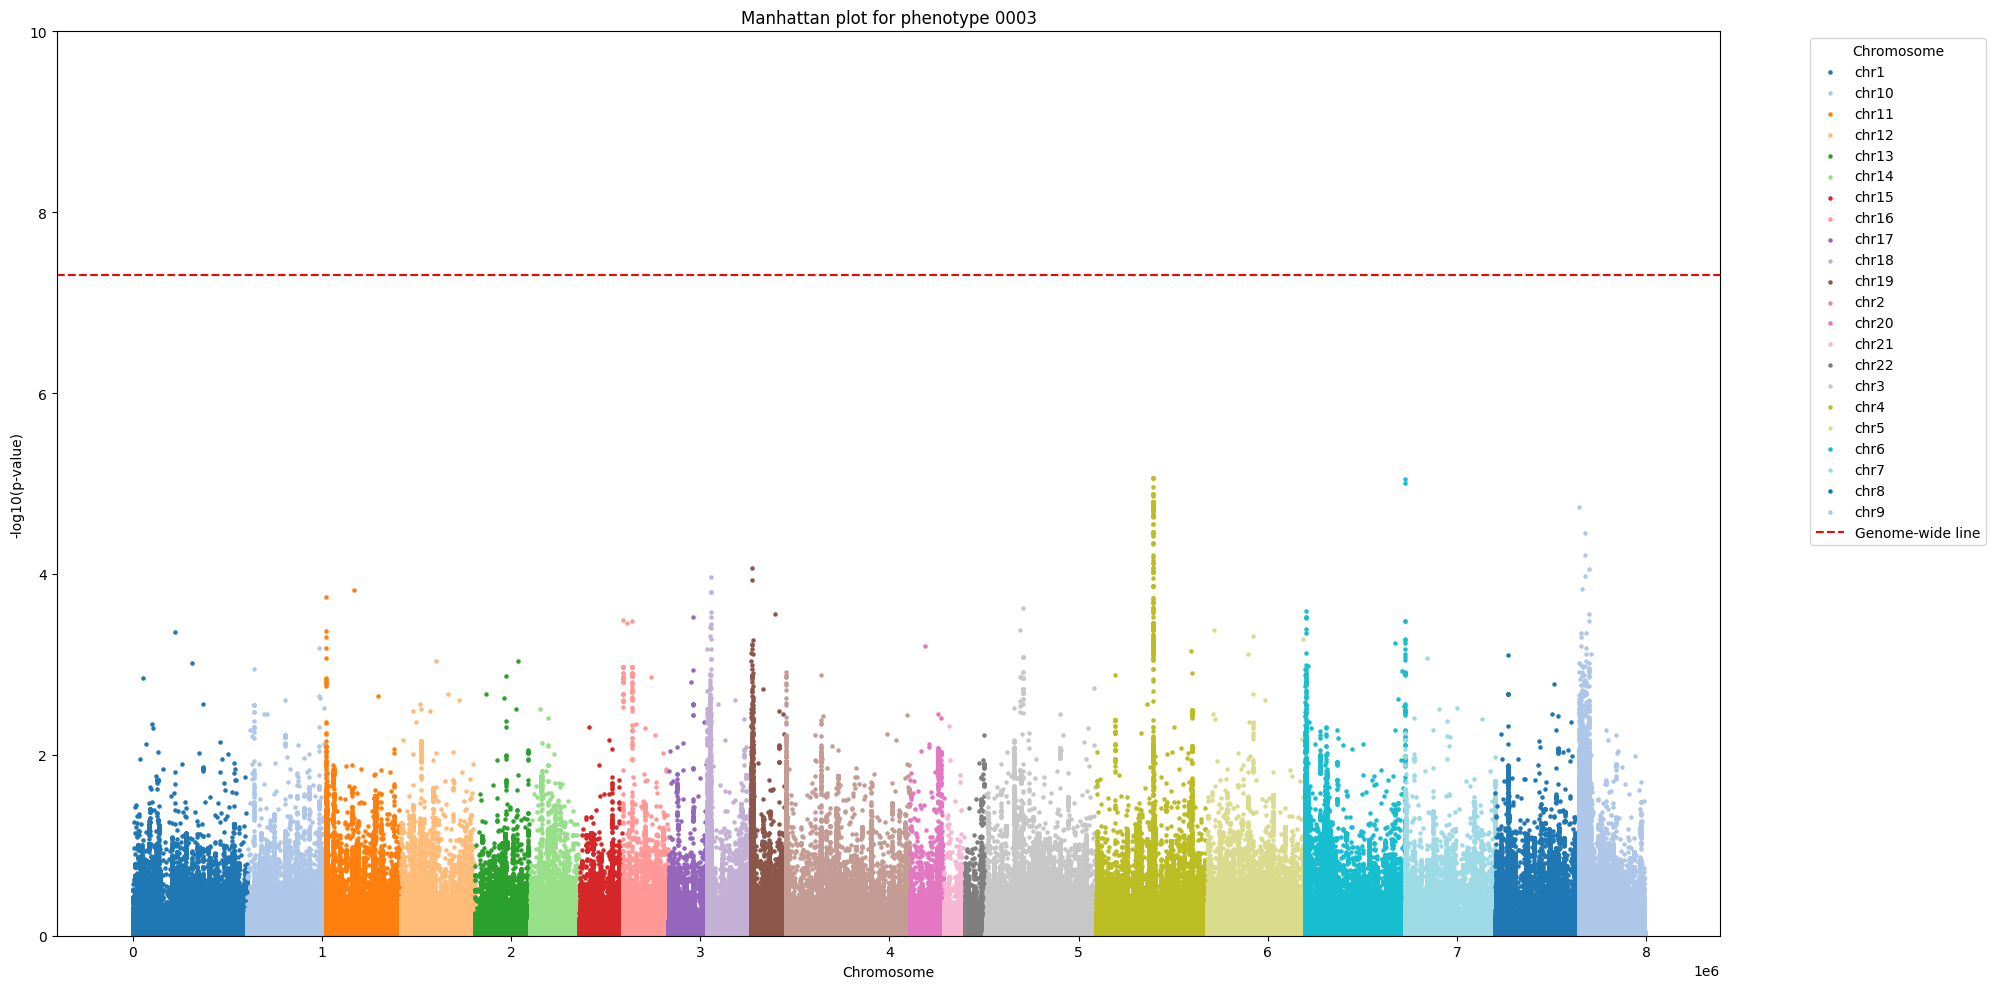

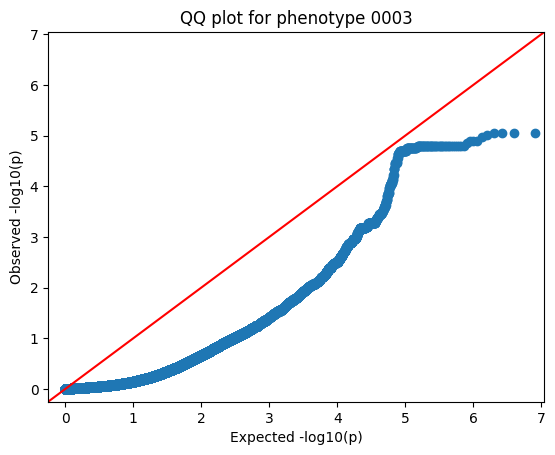

Phenotype 4: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.004796  0.996173   
1                 T          hg38   0.011650          312 -0.067722  0.946007   
2                 C          hg38   0.122330          312 -0.004632  0.996304   
3                 C          hg38   0.026214          312 -0.057580  0.954083   
4                 C          hg38   0.021359          312 -0.037793  0.969853   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


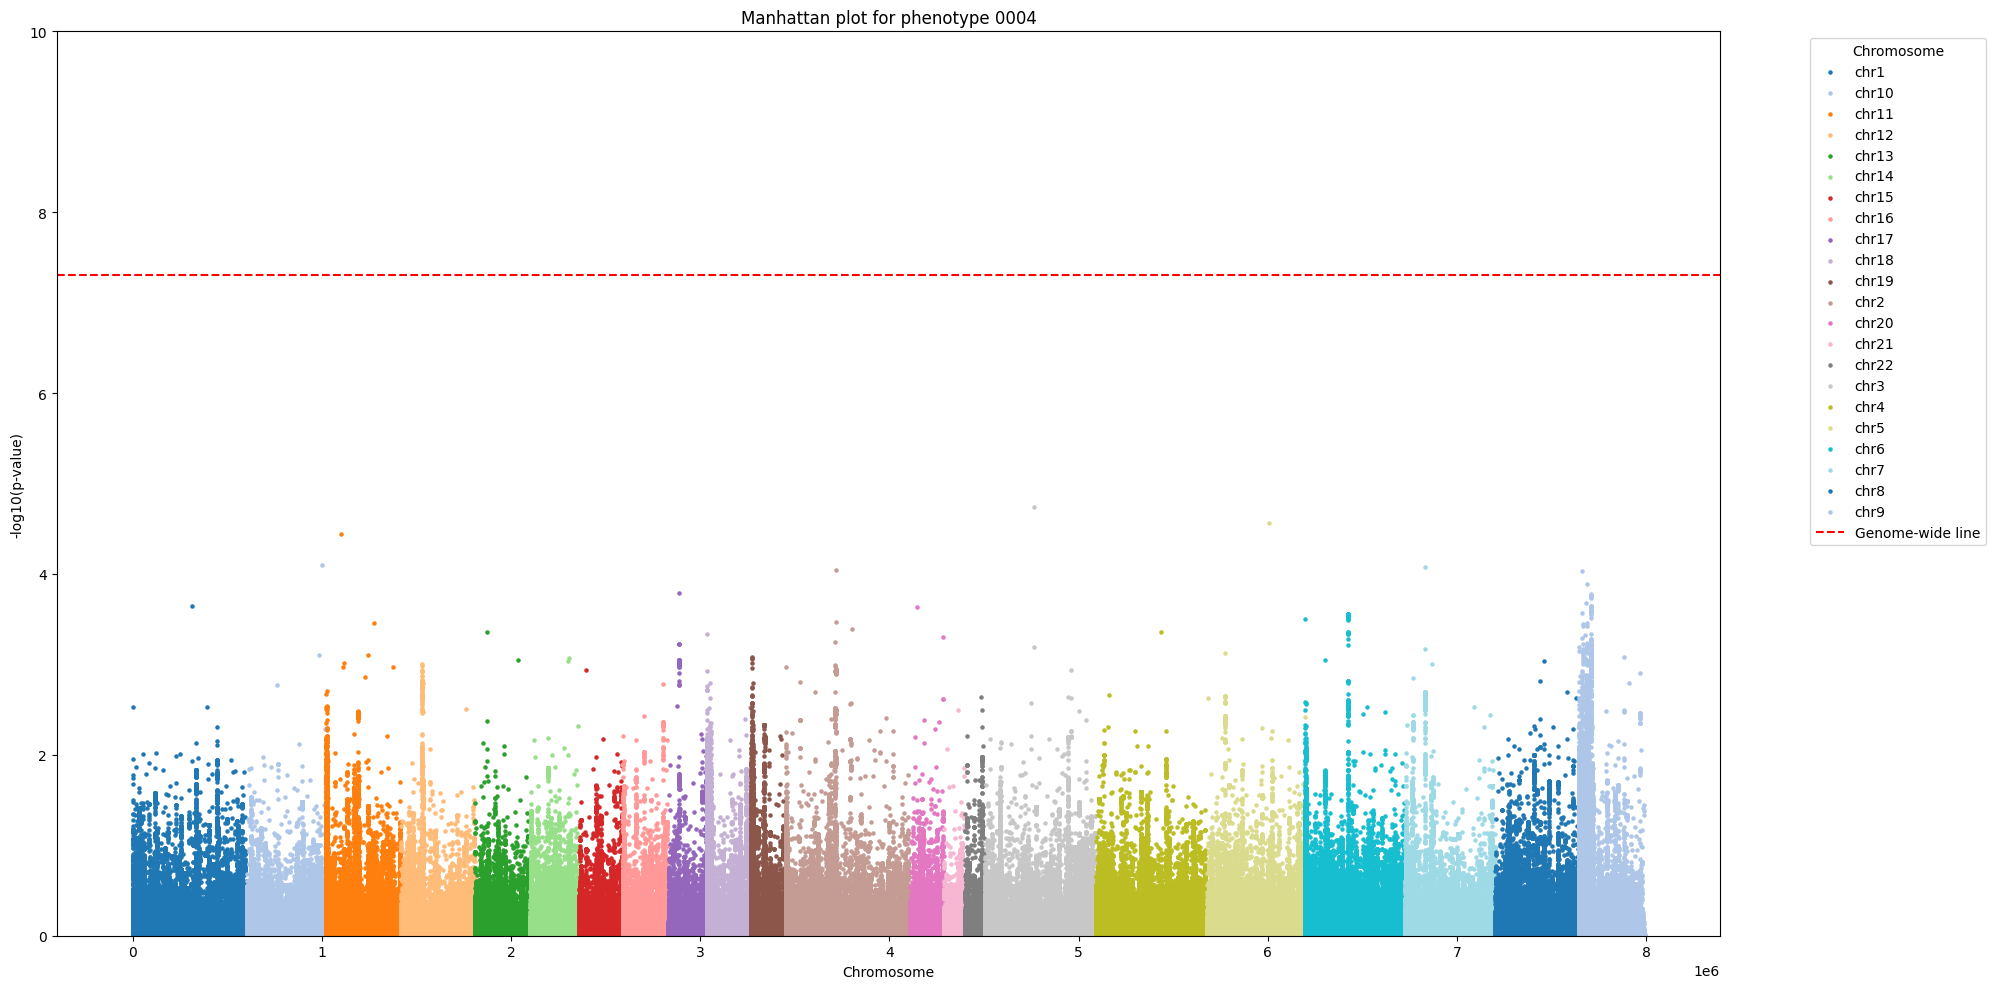

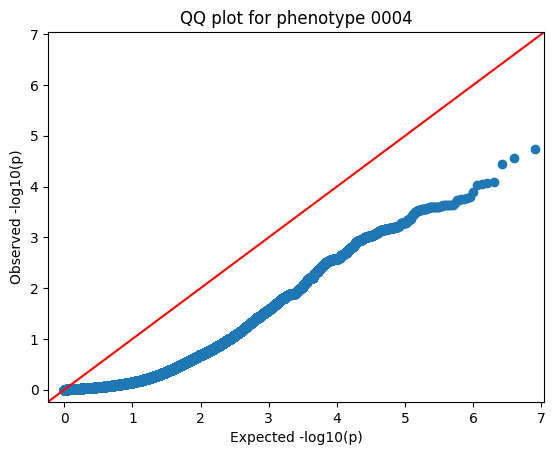

Phenotype 5: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.022234  0.982261   
1                 T          hg38   0.011650          312 -0.080086  0.936169   
2                 C          hg38   0.122330          312 -0.008275  0.993398   
3                 C          hg38   0.026214          312 -0.034884  0.972172   
4                 C          hg38   0.021359          312 -0.015986  0.987246   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


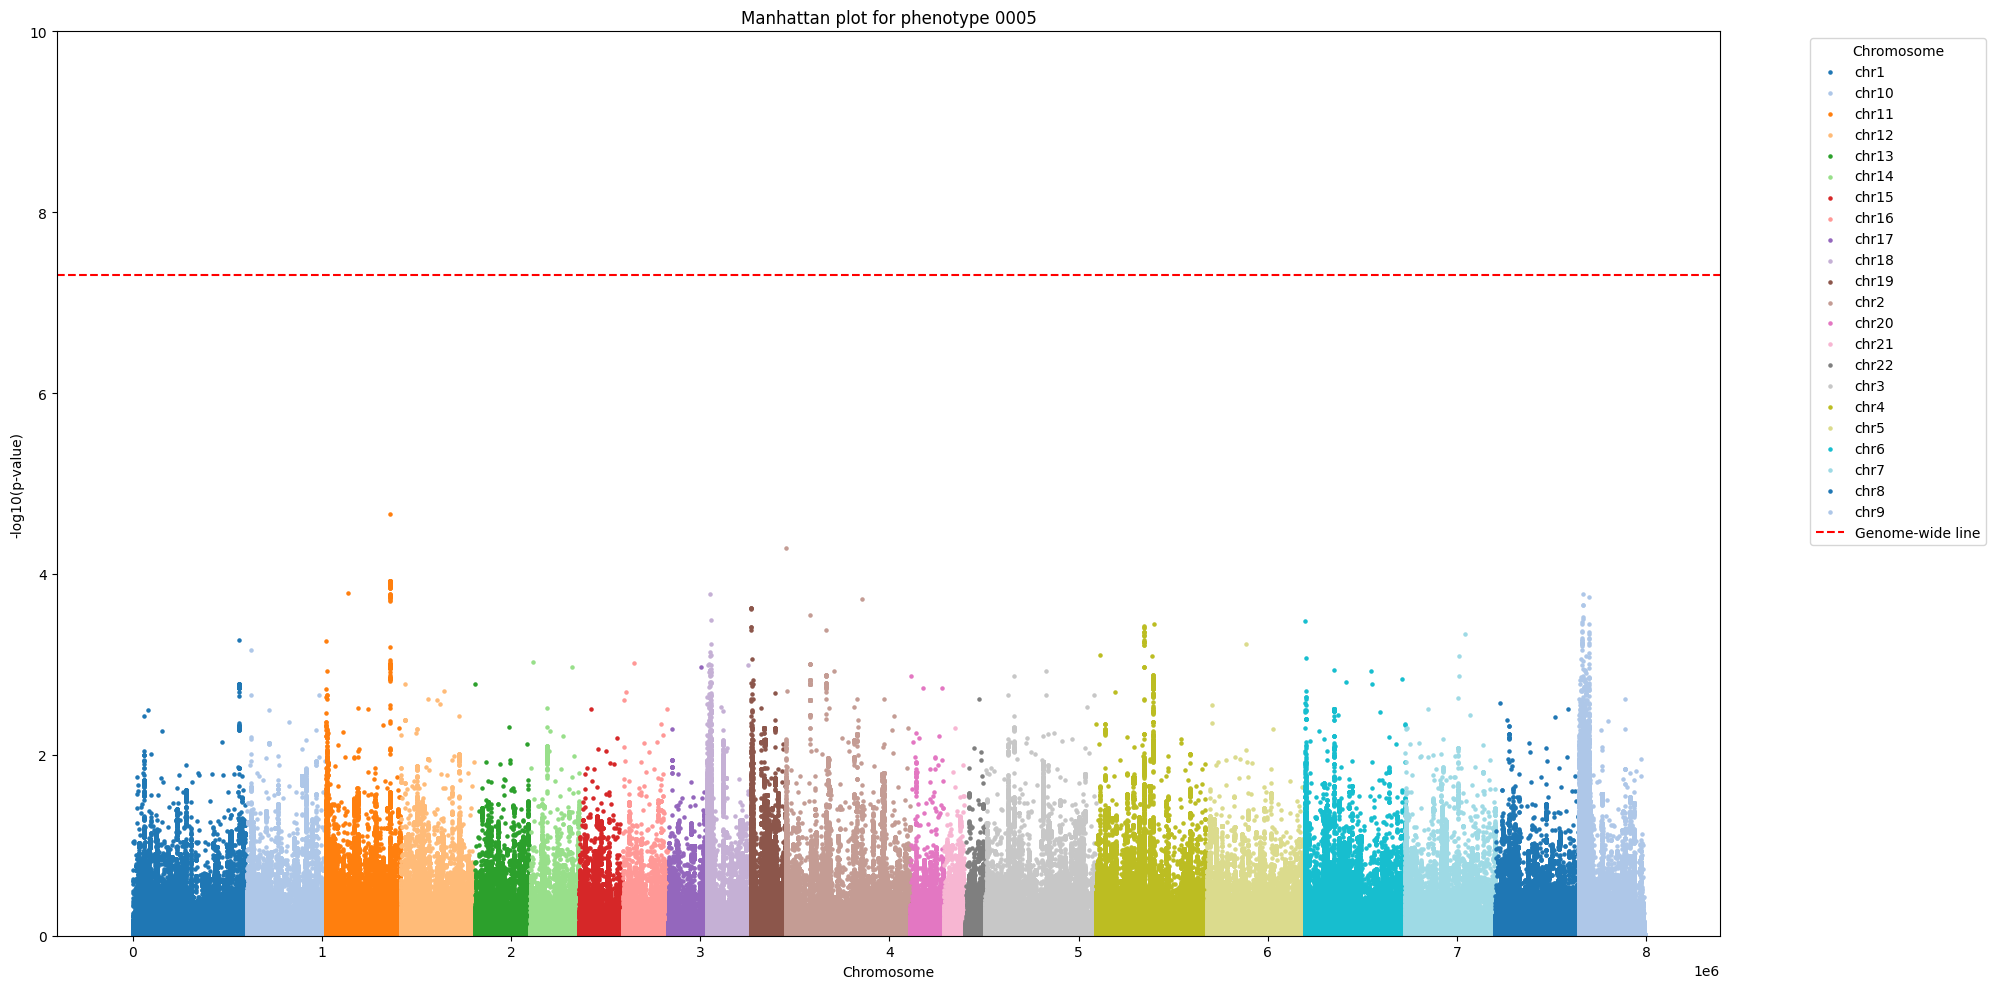

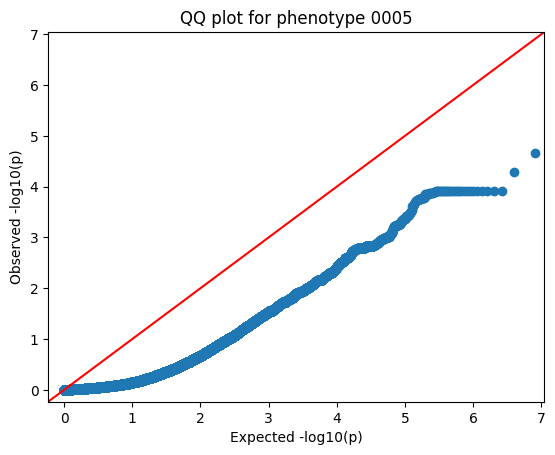

Phenotype 6: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312 -0.004693  0.996255   
1                 T          hg38   0.011650          312  0.044115  0.964813   
2                 C          hg38   0.122330          312  0.007045  0.994379   
3                 C          hg38   0.026214          312  0.011598  0.990746   
4                 C          hg38   0.021359          312 -0.002922  0.997669   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


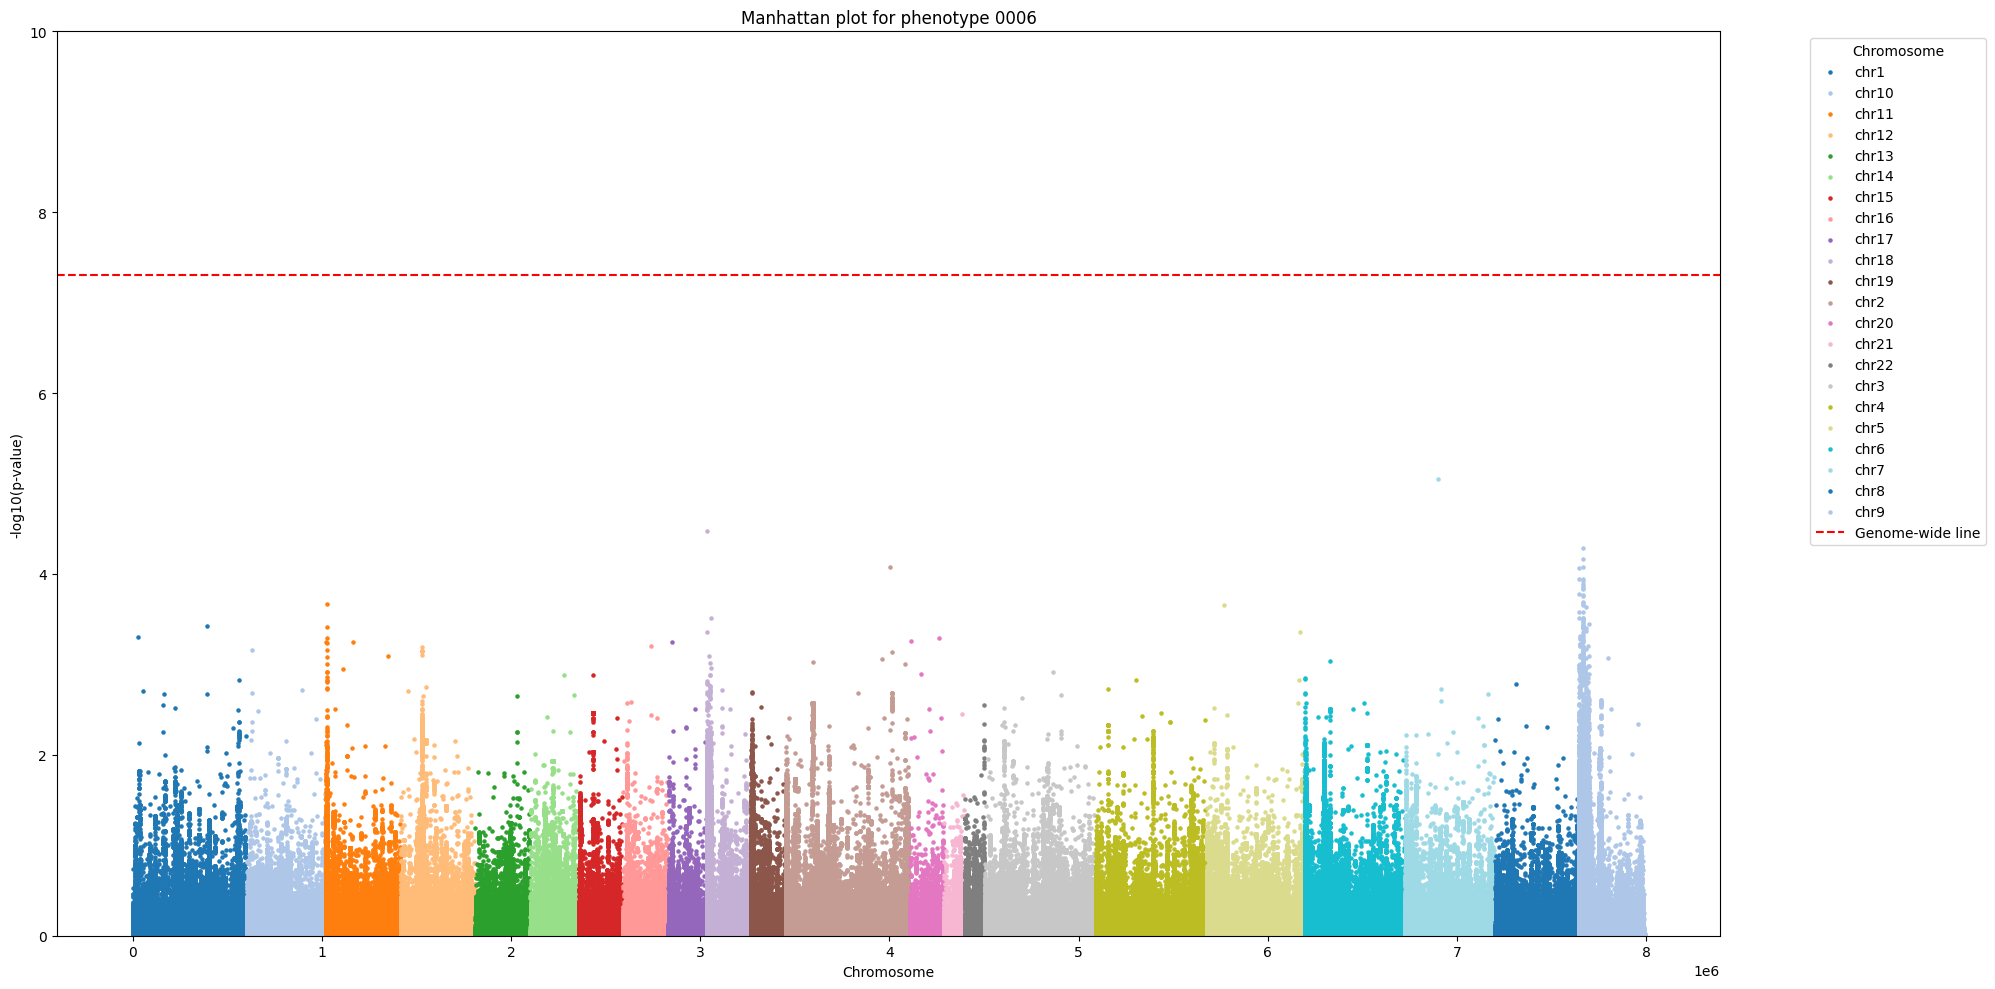

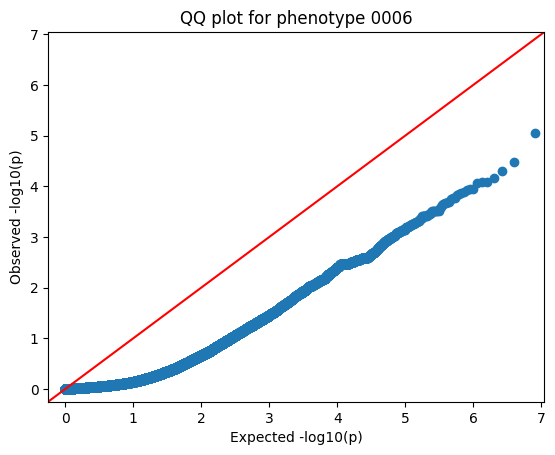

Phenotype 7: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.036957  0.970519   
1                 T          hg38   0.011650          312 -0.093908  0.925182   
2                 C          hg38   0.122330          312 -0.016210  0.987067   
3                 C          hg38   0.026214          312  0.009174  0.992681   
4                 C          hg38   0.021359          312  0.030928  0.975327   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


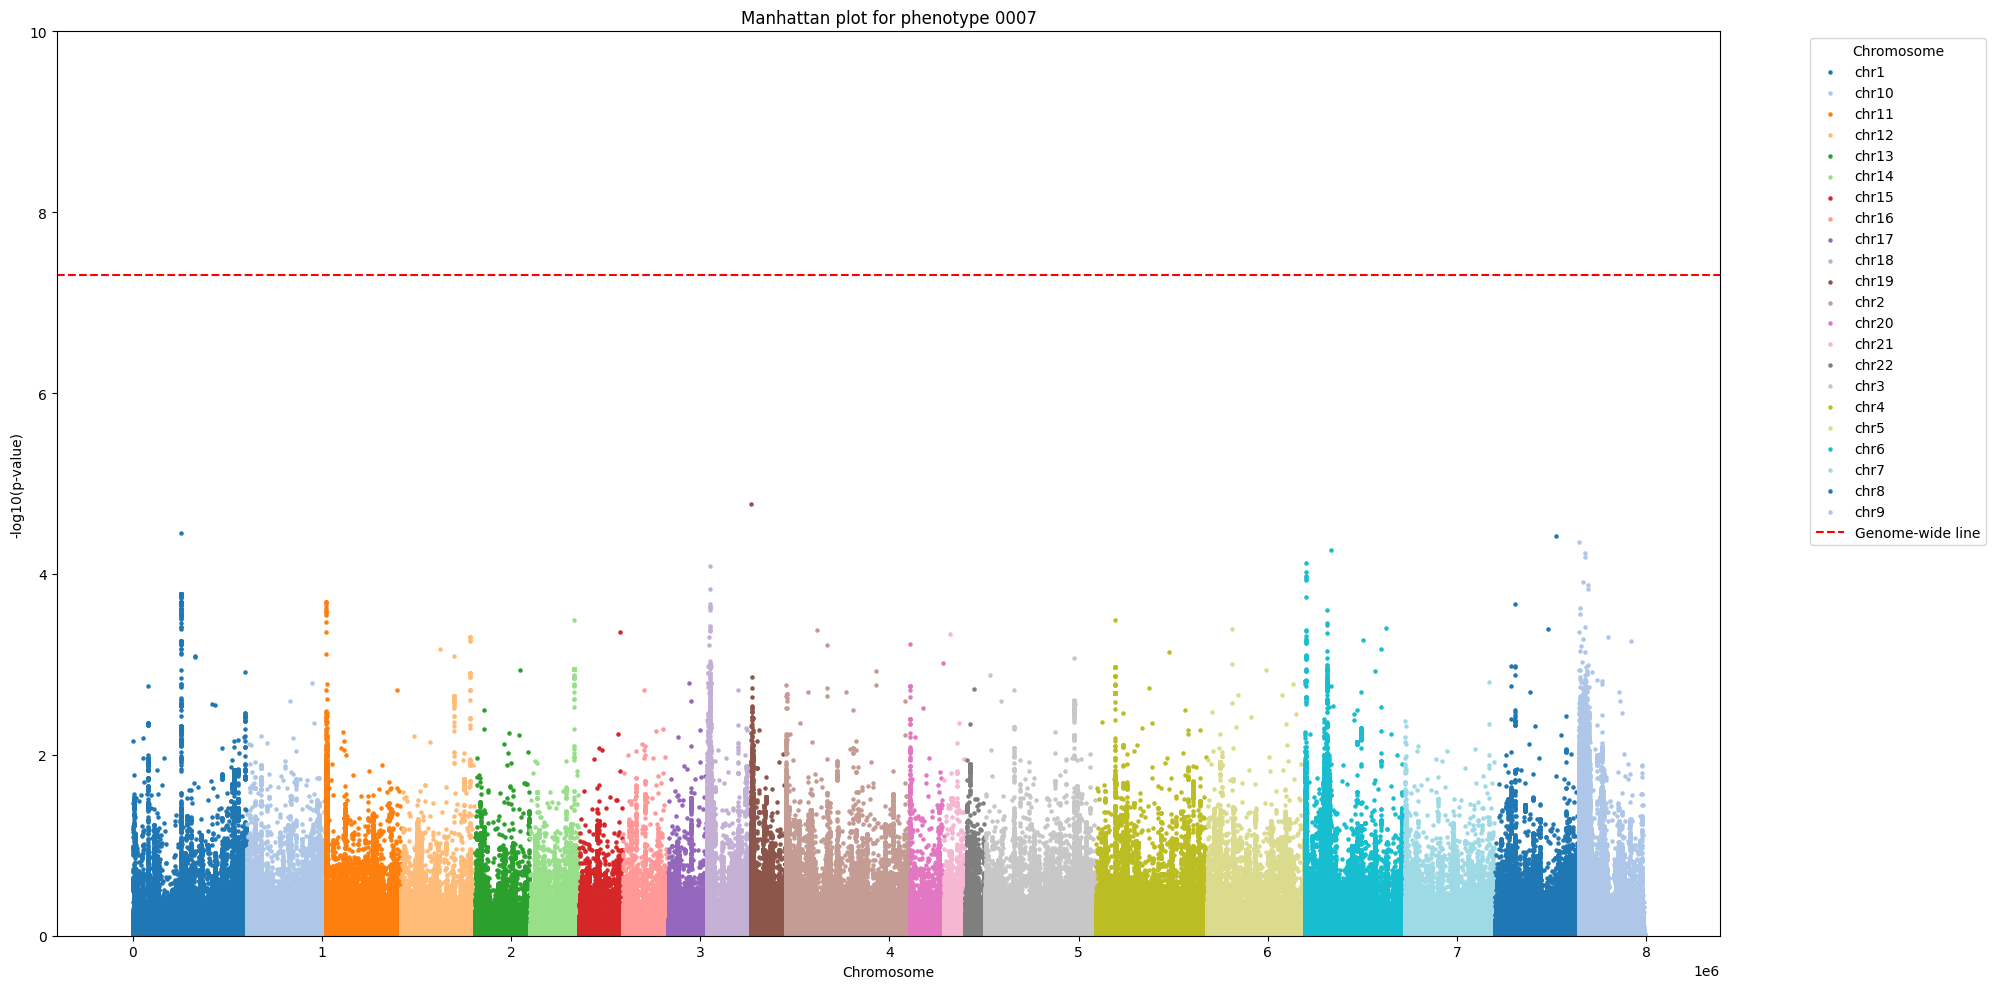

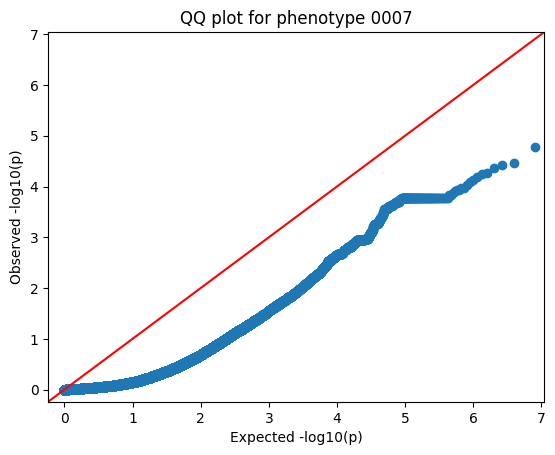

Phenotype 8: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312  0.019702  0.984281   
1                 T          hg38   0.011650          312 -0.044914  0.964176   
2                 C          hg38   0.122330          312 -0.002730  0.997822   
3                 C          hg38   0.026214          312 -0.024011  0.980844   
4                 C          hg38   0.021359          312 -0.017090  0.986365   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


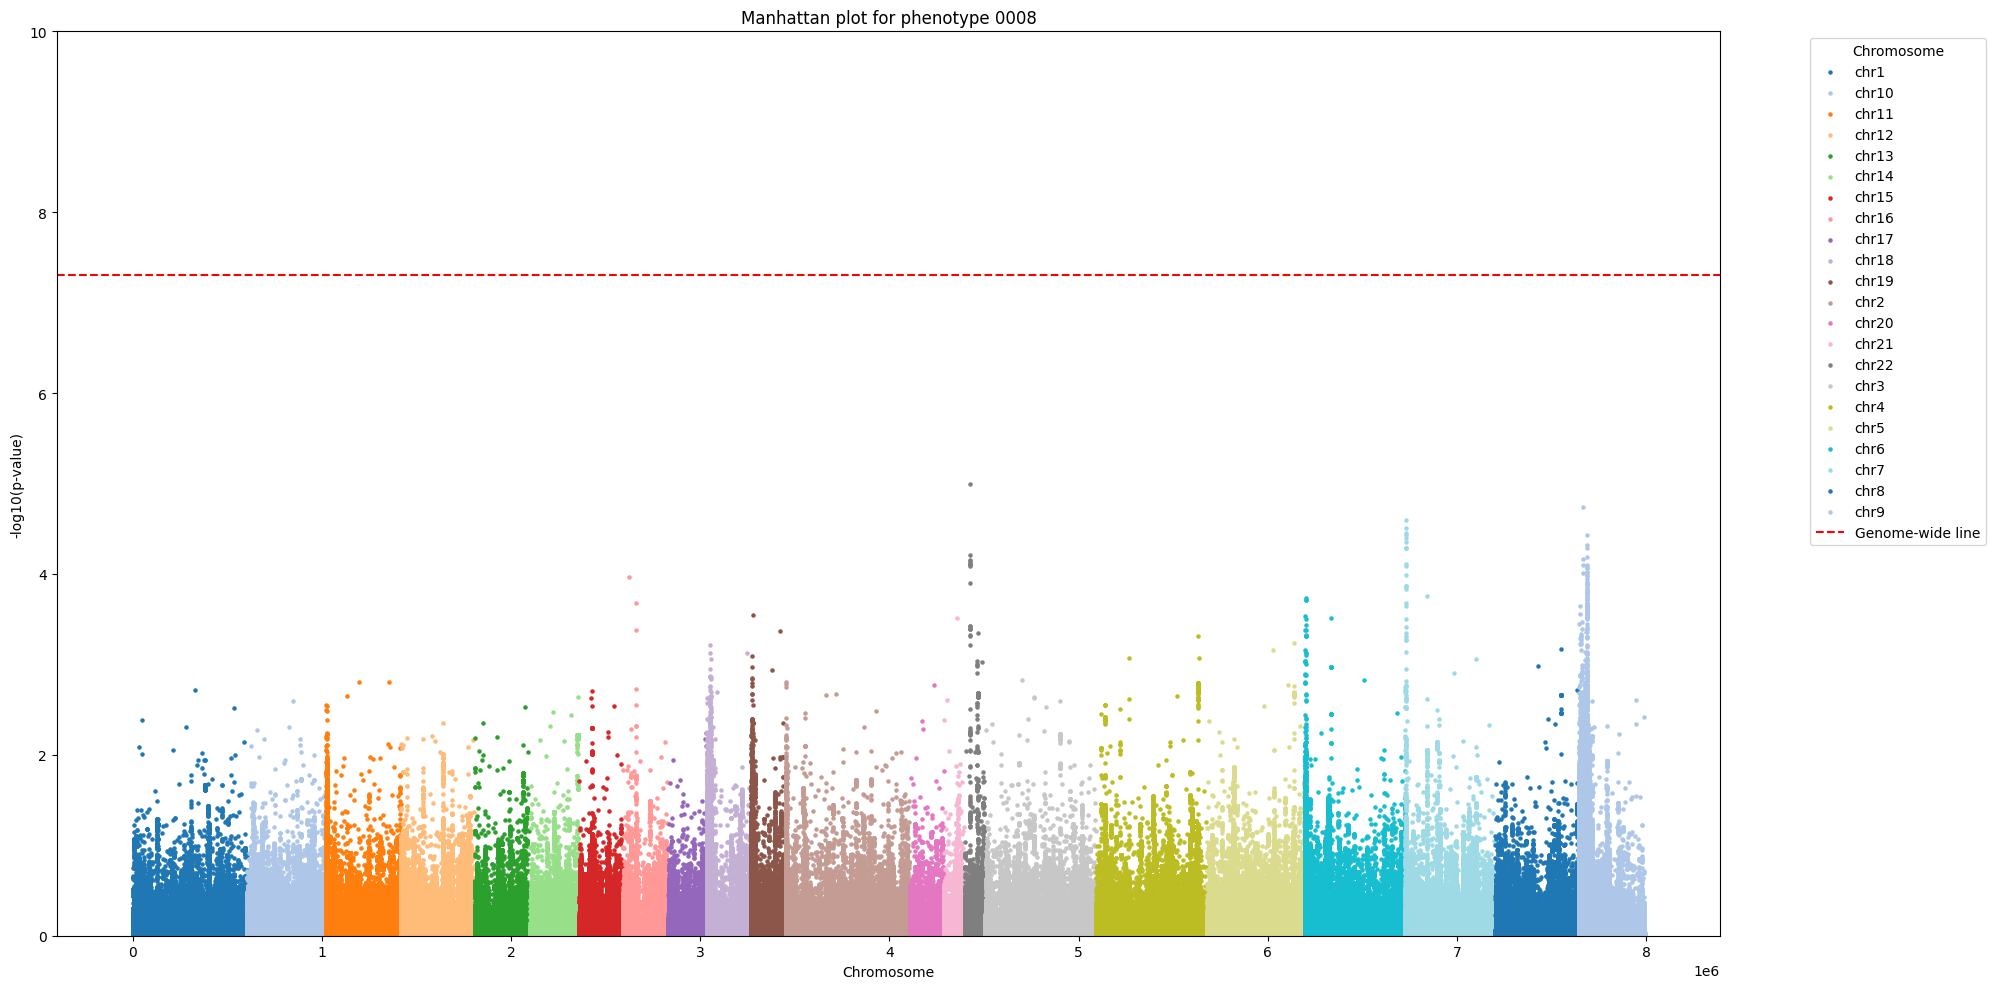

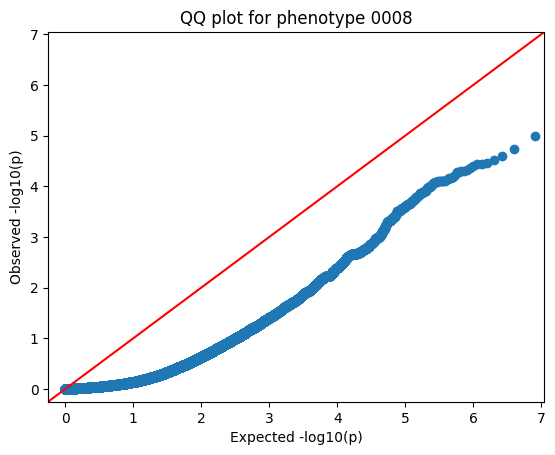

Phenotype 9: Dimensions = (7990523, 15)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs141149254   chr1_54490_G_A_b38       chr1     54490             A   
1  rs188486692   chr1_87021_T_C_b38       chr1     87021             C   
2  rs112455420  chr1_263722_C_G_b38       chr1    263722             G   
3  rs144425991  chr1_594402_C_T_b38       chr1    594402             T   
4   rs55973403  chr1_630555_C_T_b38       chr1    630555             T   

  non_effect_allele current_build  frequency  sample_size    zscore    pvalue  \
0                 G          hg38   0.177670          312 -0.003477  0.997226   
1                 T          hg38   0.011650          312  0.021470  0.982871   
2                 C          hg38   0.122330          312  0.005213  0.995840   
3                 C          hg38   0.026214          312 -0.006325  0.994953   
4                 C          hg38   0.021359          312 -0.013933  0.988883   

   effect_size  standard_err

/tmp/ipykernel_3879793/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


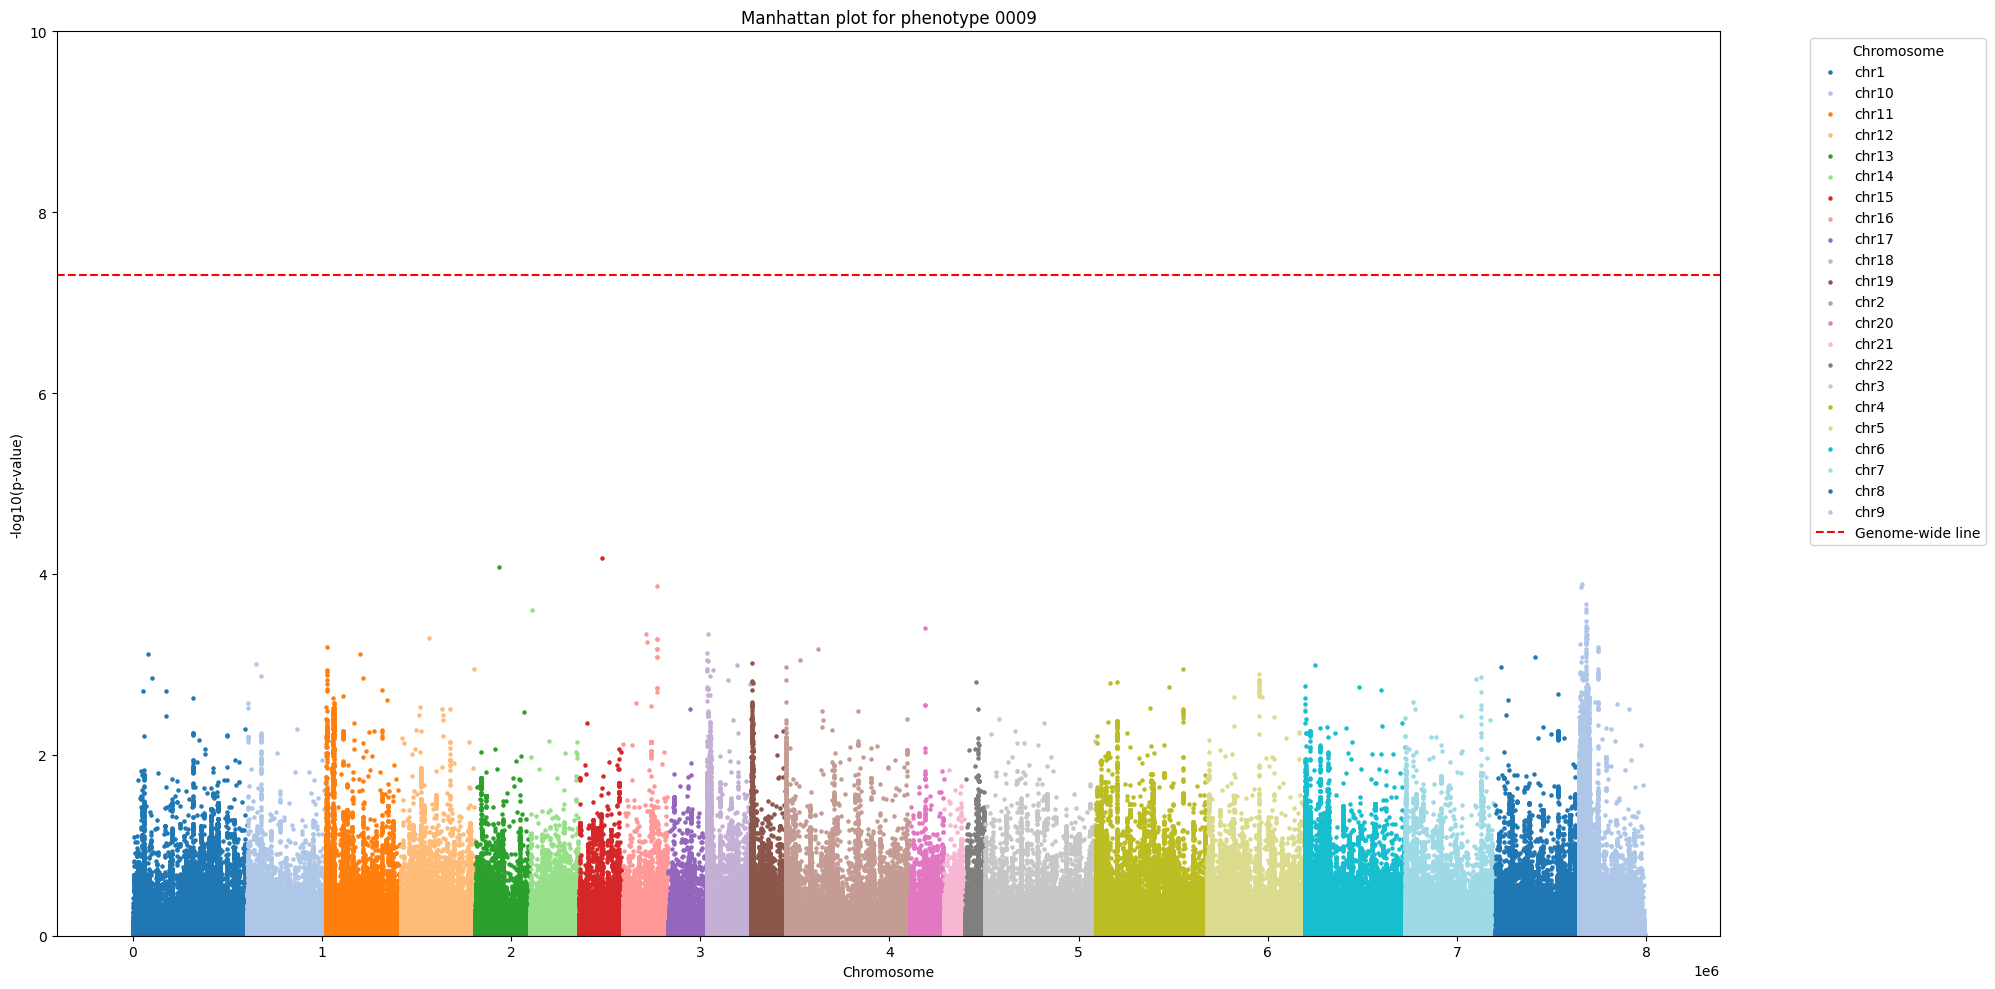

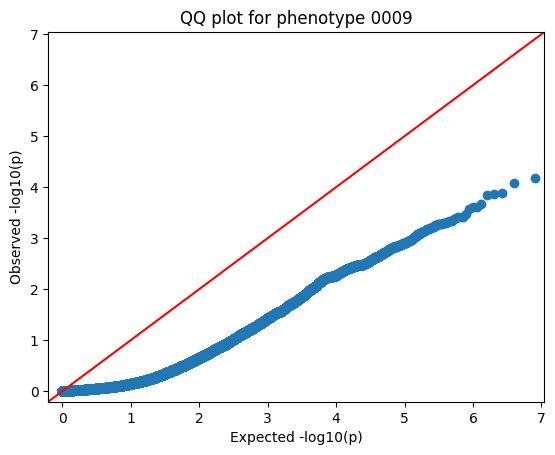

In [12]:
num_rand_phenotypes = 10

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype:04d}.glm-imputed.txt.gz"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="chromosome",
        bp_col="position",
        p_col="pvalue",
        snp_col="variant_id",
        title=f"Manhattan plot for phenotype {phenotype:04d}"
    )
    
    # QQ plot
    plot_qq(gwas["pvalue"], title=f"QQ plot for phenotype {phenotype:04d}")
